In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import datetime

### Tratamento do banco de dados

* Padronização dos atributos
* Modificação do tipo de dados dos atributos
* Separação da data dd/mm/aa em colunas separadas de dia, mês e ano


In [75]:
def tratamento_banco():
    # Abrindo o banco de dados
    df = pd.read_csv("C:/Users/Matheus/Desktop/Github/predict-actions-price/workspace/data/acoes_petr4.csv")
    ### Padronizando os tipos de dados dos atributos
    # Padronizando atributo Data - Para Datetime
    df["Data"] = pd.to_datetime(df["Data"])
    # Padronizando atributo Última, abertura, máxima e mínima -  Float
    for col in ["Último","Abertura","Máxima","Mínima"]:
        df[col] = df[col].str.replace(",",".").astype("float")
    # Padronizando Vol. e Var% como valores flutuantes
    df["Vol."] = df["Vol."].apply(lambda x : float(x.replace(",",".").replace("M",""))*1000000 if x.count("M") == 1 else float(x.replace(",",".").replace("K",""))*1000)
    df["Var%"] = df["Var%"].apply(lambda x : float(x.replace("%","").replace(",",".")))
    ## Criar atributos de dia, mês e ano
    df['Dia'] = df['Data'].dt.day
    df['Mes'] = df['Data'].dt.month
    df['Ano'] = df['Data'].dt.year
    ## Renomeando colunas
    df.rename(columns = {"Último":"Ultimo","Máxima":"Maxima","Mínima":"Minima","Vol.":"Vol","Var%":"Var"}, inplace = True)
    # Selecionando atributos para trabalhar
    df = df[["Data","Ultimo"]]
    return df
    
df = tratamento_banco()

In [76]:
# Filtrando valores de ações para periodo de governo da Dilma
dilma = df[(df["Data"] > "2011-01-01") & (df["Data"] <= "2016-08-31")]

In [85]:
dilma["mediaMovel"] = dilma.rolling(window=30).mean()

C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
dilma.head()

,Data,Ultimo,mediaMovel
497,2016-08-12,15.06,NaN
498,2016-07-12,15.22,NaN
499,2016-06-12,15.49,NaN
500,2016-05-12,15.02,NaN
501,2016-02-12,15.19,NaN


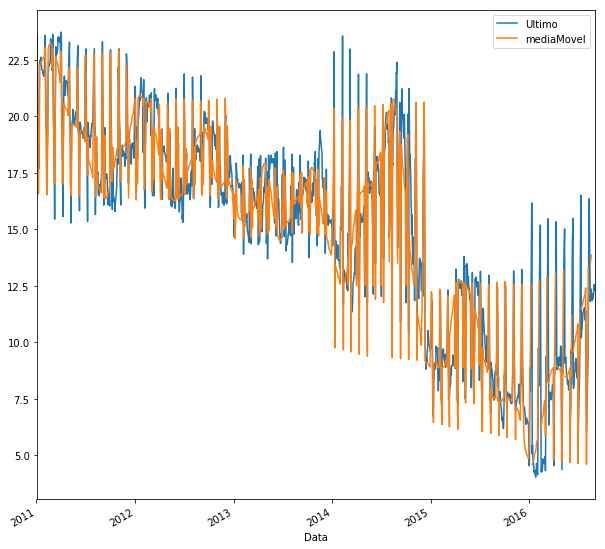

In [82]:
# Plotando gráfico do valor da ação pelo período
dilma.plot(y =["Ultimo","mediaMovel"],x ="Data",figsize=(10,10));

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
treino = dilma[(dilma["Data"] > "2011-01-01") & (dilma["Data"] <= "2011-12-31")]
teste = dilma[(dilma["Data"] > "2012-01-01") & (dilma["Data"] <= "2012-12-31")]

treino_x, treino_y = np.array(treino["mediaMovel"]).reshape(1,-1),treino["Ultimo"]
teste_x, teste_y = teste["mediaMovel"],teste["Ultimo"]

In [87]:
modelo = RandomForestClassifier()
modelo.fit(treino_x,treino_y)

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Unknown label type: 'continuous'